# Этап 1. Генерация изображения по описанию

In [ ]:
!pip install diffusers
# Эта команда устанавливает библиотеку `diffusers`, которая предоставляет инструменты и модели для генерации изображений на основе текстовых описаний.
# Она включает в себя различные модели генерации изображений, такие как Stable Diffusion, и позволяет легко интегрировать их в ваши проекты.

!pip install torch
# Эта команда устанавливает библиотеку `torch` (PyTorch), которая является мощным инструментом для работы с глубоким обучением.
# PyTorch используется для создания и обучения нейронных сетей, и он поддерживает динамическое вычисление на GPU, что ускоряет обучение моделей.

!pip install accelerate
# Эта команда устанавливает библиотеку `accelerate`, которая упрощает работу с распределёнными вычислениями и ускоряет обучение моделей.
# Она помогает масштабировать обучение и инференс на нескольких GPU или в распределенных системах, делая это проще и эффективнее.

!pip install huggingface_hub

# 2 вариант пропмтов (к 31.10.2024) для создания изображений карьера с множеством камней, расположенных в 10-15 метрах от фотографа:

Here are some prompts for generating images of a quarry with many rocks positioned 10-15 meters from the photographer:

9. "Photograph of a coal pit with numerous rocks located 10-15 meters from the camera, against a clear blue sky" = Фотография угольного карьера с многочисленными скалами, расположенными в 10-15 метрах от камеры, на фоне ясного голубого неба,
10. "Photograph of a granite quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky" = Фотография гранитного карьера с многочисленными скалами, расположенными в 10-15 метрах от камеры, на фоне ясного голубого неба,
11. "Photograph of an iron ore quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky" = Фотография железорудного карьера с многочисленными скалами, расположенными в 10-15 метрах от камеры, на фоне ясного голубого неба,
12. "A quarry landscape image of a coal pit with large scattered stones located 10-15 meters in front of the photographer" = Снимок угольного карьера с крупными разбросанными камнями, расположенными в 10-15 метрах перед фотографом,
13. "A quarry landscape image a granite quarry with large scattered stones located 10-15 meters in front of the photographer" = Снимок гранитного карьера с крупными разбросанными камнями, расположенными в 10-15 метрах перед фотографом,
14. "A quarry landscape image of an iron ore quarry with large scattered stones located 10-15 meters in front of the photographer" = Снимок железорудного карьера с крупными разбросанными камнями, расположенными в 10-15 метрах перед фотографом,
15. "Close-up shot of a coal quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain" = Крупный план угольной каменоломни, фокусирующийся на различных камнях, расположенных в 10-15 метрах от объектива, в окружении пересечённой местности,
16. "Close-up shot of a granite quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain" = Крупный план гранитной каменоломни, фокусирующийся на различных камнях, расположенных в 10-15 метрах от объектива, в окружении пересечённой местности,
17. "Close-up shot of an iron ore quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain" = Крупный план железорудной каменоломни, фокусирующийся на различных камнях, расположенных в 10-15 метрах от объектива, в окружении пересечённой местности

In [ ]:
# @title 2 вариант к 31.10.2024 - сохранение сгенерированных файлов на Google Disk

# Импортируем необходимые модули
from diffusers import AutoPipelineForText2Image  # Импортируем класс для создания текстово-изображенческого пайплайна
import torch
import os  # Импортируем модуль для работы с файловой системой
from PIL import Image  # Импортируем модуль для работы с изображениями
from google.colab import drive  # Импортируем модуль для подключения Google Диска

# Подключаем Google Диск
drive.mount('/content/drive')

# Указываем путь к папке на Google Диске, в которую будем сохранять изображения
output_folder = '/content/drive/MyDrive/diffusers_plus_FastSAM/'  # Убедитесь, что путь указан правильно

# Создаем папку на Google Диске, если ее нет
os.makedirs(output_folder, exist_ok=True)

from accelerate import PartialState  # Импортируем класс PartialState из accelerate для работы с распределёнными вычислениями
distributed_state = PartialState()  # Создаем экземпляр PartialState для распределенных состояний

#device = "cuda" if torch.cuda.is_available() else "cpu"
#pipe.to(device)

# Загружаем предобученный пайплайн для генерации изображений по текстовому описанию
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo")

# Задаем текстовые описания (промпты) для генерации изображений
    # "Photograph of a coal pit with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    # "Photograph of a granite quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    # "Photograph of an iron ore quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    # "A quarry landscape image showing of a coal pit with large scattered stones located 10-15 meters in front of the photographer",
    # "A quarry landscape image showing of a granite quarry with large scattered stones located 10-15 meters in front of the photographer",
    # "A quarry landscape image showing an iron ore quarry with large scattered stones located 10-15 meters in front of the photographer",
prompts = [
    "Close-up shot of a granite quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain",
    "Close-up shot of an iron ore quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain",
    "Close-up shot of a coal quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain" # 18 -> 15
]

# Указываем количество изображений, которые нужно сгенерировать
num_images_to_generate = 10

# Указываем сдвиг в нумерации файлов и папок
b_num = 16

# Генерируем изображения для каждого промпта
for idx, prompt in enumerate(prompts):
    # Создаем папку для текущего промпта на Google Диске
    folder_name = os.path.join(output_folder, str(idx+b_num))
    os.makedirs(folder_name, exist_ok=True)

    for img_num in range(num_images_to_generate):
        # Генерируем изображение с заданным размером
        image = pipe(prompt=prompt, height=1024, width=1024, num_inference_steps=1, guidance_scale=1.0).images[0]

        # Определяем имя файла для сохранения сгенерированного изображения
        image_file_name = os.path.join(folder_name, f"prompt_{idx+b_num}_image_{img_num + 1}.jpg")

        # Сохраняем изображение
        image.save(image_file_name)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

# Код c huggingface:
https://huggingface.co/black-forest-labs/FLUX.1-dev

In [ ]:
import torch
from diffusers import DiffusionPipeline
from huggingface_hub import login
import os  # Импортируем модуль для работы с файловой системой
from google.colab import drive  # Импортируем модуль для подключения Google Диска
from google.colab import auth

# Аутентификация пользователя
auth.authenticate_user()

# Подключаем Google Диск
drive.mount('/content/drive')

# Указываем путь к папке на Google Диске, в которую будем сохранять изображения
output_folder = '/content/drive/MyDrive/huggingface_hub/'
os.makedirs(output_folder, exist_ok=True)

# Загружаем токен доступа из текстового файла
token_file_path = 'huggingface_token_for_DashLeb.txt'
with open(token_file_path, 'r') as file:
    token = file.read().strip()

# Входим в систему с токеном
login(token)

# Загружаем модель
pipe = DiffusionPipeline.from_pretrained("black-forest-labs/FLUX.1-dev")

prompts = [
    "Photograph of a coal pit with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    "Photograph of a granite quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    "Photograph of an iron ore quarry with numerous rocks located 10-15 meters from the camera, against a clear blue sky",
    "A quarry landscape image showing of a coal pit with large scattered stones located 10-15 meters in front of the photographer",
    "A quarry landscape image showing of a granite quarry with large scattered stones located 10-15 meters in front of the photographer",
    "A quarry landscape image showing an iron ore quarry with large scattered stones located 10-15 meters in front of the photographer",
    "Close-up shot of a coal quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain",
    "Close-up shot of a granite quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain",
    "Close-up shot of an iron ore quarry focusing on various stones located 10-15 meters from the lens, surrounded by rough terrain"
]

# Инициализация индексов
img_num = 0

for idx, prompt in enumerate(prompts):
    try:
        with torch.no_grad():
            image = pipe(
                prompt,
                height=1024,
                width=1024,
                guidance_scale=3.5,
                num_inference_steps=50,
                generator=torch.Generator("cpu").manual_seed(0)  # Используйте "cpu" если у вас нет GPU
            ).images[0]

        # Создаем папку для текущего промпта на Google Диске
        folder_name = os.path.join(output_folder, str(idx + 8))
        os.makedirs(folder_name, exist_ok=True)

        # Определяем имя файла для сохранения сгенерированного изображения
        image_file_name = os.path.join(folder_name, f"prompt_{idx + 8}_flux-dev_{img_num + 1}.jpg")

        # Сохраняем изображение
        image.save(image_file_name)
        img_num += 1  # Увеличиваем счетчик изображений

    except Exception as e:
        print(f"Error generating image for prompt {idx + 8}: {e}")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/drive
The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /root/.cache/huggingface/token
Login successful


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

(…)t_encoder_2/model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_2/tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

transformer/config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

# 1 вариант пропмтов (от 08.10.2024) для создания изображений карьера с множеством камней, расположенных в 10-15 метрах от фотографа:

Here are some prompts for generating images of a quarry with many rocks positioned 10-15 meters from the photographer:

0. "Open pits workplace rock chunks after blasting, large scale, zoom rock, big rocks, located 10-15 meters in front of the photographer" = "Открытые карьеры, измельчённые куски породы после взрывных работ, крупномасштабные, масштабный камень, большие камни, расположенные в 10-15 метрах от фотографа".

1. "Photograph of a quarry with numerous rocks situated 10-15 meters away from the camera, with a clear blue sky above." = "Фотография карьера с многочисленными скалами, расположенными в 10-15 метрах от камеры, на фоне ясного голубого неба."

2. "A quarry landscape image showing large, scattered rocks located 10-15 meters in front of the photographer." = "Изображение ландшафта карьера, на котором видны большие разбросанные камни, расположенные в 10-15 метрах перед фотографом".

3. "Close-up shot of a quarry environment, focusing on various rocks positioned 10-15 meters from the lens, surrounded by rugged terrain." = "Крупный план пейзажа карьера, на котором изображены различные скалы, расположенные в 10-15 метрах от объектива, в окружении неровной местности."

4. "A picturesque quarry scene where multiple stones are arranged 10-15 meters away from the photographer, under natural lighting." = "Живописный пейзаж карьера, на котором множество камней расположены в 10-15 метрах от фотографа, при естественном освещении."

5. "Sunlit quarry photograph with rocks distinctly placed 10-15 meters from the camera, casting shadows on the ground." = "Фотография освещенного солнцем карьера с четко различимыми скалами, расположенными в 10-15 метрах от камеры, отбрасывающими тени на землю."

6. "Realistic photo capturing a quarry's essence, emphasizing rocks that are 10-15 meters away from the photographer's viewpoint." = "Реалистичная фотография, передающая суть карьера, с акцентом на скалы, расположенные в 10-15 метрах от фотографа."

7. "Daytime quarry photo featuring rocks positioned 10-15 meters from the photographer, with machinery visible in the distance." = "Дневная фотография карьера с камнями, расположенными в 10-15 метрах от фотографа, с виднеющейся вдалеке техникой."

8. "Image of a barren quarry landscape, focusing on stones lying 10-15 meters away from the camera, against a backdrop of steep quarry walls." = "Изображение пустынного ландшафта карьера с фокусировкой на камнях, лежащих в 10-15 метрах от камеры, на фоне крутых стен карьера".

In [ ]:
# @title 1 вариант от 08.10.2024 -> сохранение сгенерированных файлов на Google Disk (https://drive.google.com/drive/folders/15a2Am3DeSQtQ2oY-s_xQrkZAm2Ozo8e9?usp=drive_link)

# Импортируем необходимые модули
from diffusers import AutoPipelineForText2Image  # Импортируем класс для создания текстово-изображенческого пайплайна
import torch
import os  # Импортируем модуль для работы с файловой системой
from PIL import Image  # Импортируем модуль для работы с изображениями
from google.colab import drive  # Импортируем модуль для подключения Google Диска

# Подключаем Google Диск
drive.mount('/content/drive')

# Указываем путь к папке на Google Диске, в которую будем сохранять изображения
output_folder = '/content/drive/MyDrive/diffusers_plus_FastSAM/'  # Убедитесь, что путь указан правильно

# Создаем папку на Google Диске, если ее нет
os.makedirs(output_folder, exist_ok=True)

from accelerate import PartialState  # Импортируем класс PartialState из accelerate для работы с распределёнными вычислениями
distributed_state = PartialState()  # Создаем экземпляр PartialState для распределенных состояний

# device = "cuda" if torch.cuda.is_available() else "cpu"
# pipe.to(device)

# Загружаем предобученный пайплайн для генерации изображений по текстовому описанию
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo")

# Задаем текстовые описания (промпты) для генерации изображений
prompts = [
    "Open pits workplace rock chunks after blasting, large scale, zoom rock, big rocks, located 10-15 meters in front of the photographer",
    "Photograph of a quarry with numerous rocks situated 10-15 meters away from the camera, with a clear blue sky above",
    "A quarry landscape image showing large, scattered rocks located 10-15 meters in front of the photographer",
    "Close-up shot of a quarry environment, focusing on various rocks positioned 10-15 meters fromthe lens, surrounded by rugged terrain",
    "A picturesque quarry scene where multiple stones are arranged 10-15 meters away from the photographer, under natural lighting",
    "Sunlit quarry photograph with rocks distinctly placed 10-15 meters from the camera, casting shadows on the ground",
    "Realistic photo capturing a quarry's essence, emphasizing rocks that are 10-15 meters away from the photographer's viewpoint",
    "Daytime quarry photo featuring rocks positioned 10-15 meters from the photographer, with machinery visible in the distance",
    "Image of a barren quarry landscape, focusing on stones lying 10-15 meters away from the camera, against a backdrop of steep quarry walls"
]

# Указываем количество изображений, которые нужно сгенерировать
num_images_to_generate = 10

# Генерируем изображения для каждого промпта
for idx, prompt in enumerate(prompts):
    # Создаем папку для текущего промпта на Google Диске
    folder_name = os.path.join(output_folder, str(idx))
    os.makedirs(folder_name, exist_ok=True)

    for img_num in range(num_images_to_generate):
        # Генерируем изображение
        image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=1.0).images[0]

        # Определяем имя файла для сохранения сгенерированного изображения
        image_file_name = os.path.join(folder_name, f"prompt_{idx}_image_{img_num + 1}.jpg")

        # Сохраняем изображение
        image.save(image_file_name)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

# Этап 2. FastSAM detect

In [ ]:
!pip3 install segment-anything-fast
# Эта команда устанавливает пакет `segment-anything-fast`, который предназначен для сегментации изображений.
# Сегментация изображений — это процесс разделения изображения на несколько сегментов или объектов.
# Пакет предоставляет быстрые и эффективные алгоритмы для выполнения задач сегментации, что может быть полезно
# для приложений компьютерного зрения, таких как распознавание объектов, анализ изображений и автоматическая аннотация данных.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.0/612.0 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [ ]:
%matplotlib inline
# Эта команда используется в Jupyter Notebook для отображения графиков и изображений, созданных с помощью matplotlib,
# непосредственно в ячейках ноутбука. Она позволяет просматривать результаты визуализации сразу после выполнения кода.

# Импортируем необходимые модули из библиотеки matplotlib.
import matplotlib.pyplot as plt   # Импортируем модуль pyplot, который предоставляет функции для построения графиков.
import matplotlib.image as mpimg  # Импортируем модуль image для работы с изображениями.

# Импортируем необходимые классы из библиотеки fastsam.
from fastsam import FastSAM, FastSAMPrompt  # FastSAM может быть инструментом для быстрой сегментации изображений, а FastSAMPrompt
                                            # может предоставлять интерфейс для взаимодействия с сегментационными моделями или алгоритмами.

In [ ]:
# Загрузим файл FastSAM-x.pt с помощью ссылки:
# https://github.com/CASIA-IVA-Lab/FastSAM#model-checkpoints

# Создаем объект модели FastSAM, используя предобученные веса из указанного файла
model = FastSAM('./FastSAM/weights/FastSAM-x.pt')

# Указываем путь к изображению, которое будет обработано моделью
IMAGE_PATH = OUT_IMAGE_NAME

# Указываем устройство для выполнения вычислений (в данном случае используется GPU с поддержкой CUDA)
DEVICE = 'GPU'
# device = "cuda" if torch.cuda.is_available() else "cpu"

# Выполняем обработку изображения с помощью модели, передавая необходимые параметры
everything_results = model(
    IMAGE_PATH,          # Путь к изображению
    device=DEVICE,       # Устройство для вычислений
    retina_masks=True,   # Использование масок для улучшения результатов
    imgsz=1024,          # Размер изображения для обработки
    conf=0.4,            # Порог уверенности для обнаружения объектов
    iou=0.9              # Порог пересечения объектов (IoU) для объединения детекций
)

# Создаем объект для обработки результатов с помощью FastSAMPrompt
prompt_process = FastSAMPrompt(IMAGE_PATH, everything_results, device=DEVICE)

# Получаем аннотации для всех объектов, используя метод everything_prompt
ann = prompt_process.everything_prompt()

# Если требуется текстовый запрос на основе аннотаций, раскомментируйте следующую строку
# ann = prompt_process.text_prompt(text='stones')

# Отображаем аннотации и сохраняем результат в указанный файл
prompt_process.plot(annotations=ann, output_path=SAM_OUT_IMAGE)


image 1/1 /content/img_out.jpg: 1024x1024 48 objects, 16799.0ms
Speed: 9.0ms preprocess, 16799.0ms inference, 175.9ms postprocess per image at shape (1, 3, 1024, 1024)


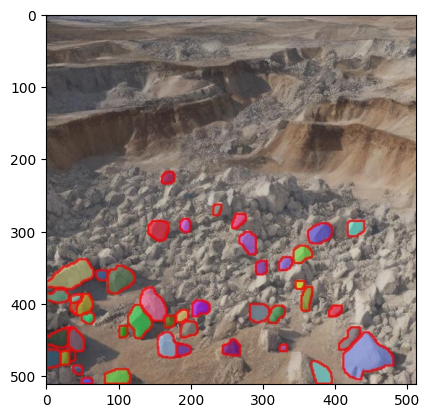

In [ ]:
# Считываем изображение из указанного файла SAM_OUT_IMAGE.
img = mpimg.imread(SAM_OUT_IMAGE)

# Отображаем изображение с помощью функции imshow из библиотеки matplotlib.
imgplot = plt.imshow(img)

# Показываем изображение на экране. Эта команда открывает окно с визуализацией изображения.
plt.show()